<a href="https://colab.research.google.com/github/campusplage/dimension-reduction/blob/master/colabs/1.introduction_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIASHS cours de master sur l'analyse de données multidimensionnelle
## TP1: manipuler des données multidimensionnelles en python

## 1. Introduction

### a. Les _python notebooks_ et google colab

Ce notebook est un TP d'introduction à la manipulation de données multidimensionnelles en python, avec `pandas` et `seaborn`. C'est peut être aussi la première fois que vous rencontrez un _python notebook_. Il s'agit de ce genre de page, où on peut mélanger du code et du texte.

Dans les notebooks, chaque _cellule_ peut être executée dans un ordre arbitraire, mais il est conseillé de les exécuter une après l'autre. En effet, si on ne le fait pas, il arrive qu'on fasse référence à des variables qui n'existent pas encore, ou bien qu'on n'a pas mis à jour au préalable de la manière souhaitée.

Comme vous le constatez, ce TP est actuellement en train de tourner sur une _machine virtuelle_ mise en place pour chacun de vous par google. C'est plutôt pratique parce que ça permet de ne nécessiter aucune installation de votre côté.

### b. Markdown et code

Chaque _cellule_ (cell en anglais) de ce notebook contient soit du texte formatté, soit du code source. Quand on veut rajouter une cellule après celle en cours, il suffit de cliquer sur les boutons `+Code` ou `+Text` en haut de la page.

* Pour le texte, les notebooks supportent le format _Markdown_ pour la mise en forme du texte. Si vous ne connaissez pas, c'est une manière très pratique de mettre en forme du texte sans la lourdeur du HTML. Vous pouvez trouver un petit tutoriel [ici](https://www.markdowntutorial.com/).
* Il y a deux manières d'executer une cellule de code: soit en cliquant sur le petit bouton "lecture" qui s'affiche quand on passe la souris par dessus le numéro, soit en appuyant sur ```shift+entrée```.

### c. Comment vous serez notés

Vous devrez déposer les notebooks modifiés sur les différents _repositories_ consacrés à chaque projet. Le détail de la procédure sera expliqué [ici]().

Ce genre de manière de travailler par des outils de gestion de version est la manière actuelle de procéder un peu partout, à la fois dans l'industrie et l'académique. C'est important pour __vous__ de savoir de quoi il s'agit quand on vous parlera de github.


### c. Remerciements

Les jeux de données de ce TP introductif sur l'ACP proviennent des resources mises en place par [François Husson](https://husson.github.io/).
Vous êtes chaleureusement invités à consulter [son site](https://husson.github.io/MOOC.html) qui vous permettra de compléter le cours et d'avoir un autre angle d'approche.

La principale différence par rapport aux support mis en place par Husson est qu'on utilisera ici le langage Python plutôt que R.



## 2. Charger les données

L'exemple que nous allons utiliser est le fichier CSV utilisé par F. Husson dans ses vidéos sur l'ACP, et fourni gracieusement sur son site.

Pour info, voici les premières lignes du __contenu brut__ du fichier:
<small>
> ```
;Janvier;Février;Mars;Avril;Mai;Juin;Juillet;Août;Septembre;Octobre;Novembre;Décembre;Moyenne;Amplitude;Latitude;Longitude;Région
Amsterdam;2.9;2.5;5.7;8.2;12.5;14.8;17.1;17.1;14.5;11.4;7;4.4;9.9;14.6;52.2;4.5;Ouest
Athènes;9.1;9.7;11.7;15.4;20.1;24.5;27.4;27.2;23.8;19.2;14.6;11;17.8;18.3;37.6;23.5;Sud
Berlin;-0.2;0.1;4.4;8.2;13.8;16;18.3;18;14.4;10;4.2;1.2;9.1;18.5;52.3;13.2;Ouest
Bruxelles;3.3;3.3;6.7;8.9;12.8;15.6;17.8;17.8;15;11.1;6.7;4.4;10.3;14.4;50.5;4.2;Ouest
Budapest;-1.1;0.8;5.5;11.6;17;20.2;22;21.3;16.9;11.3;5.1;0.7;10.9;23.1;47.3;19;Est
Copenhague;-0.4;-0.4;1.3;5.8;11.1;15.4;17.1;16.6;13.3;8.8;4.1;1.3;7.8;17.5;55.4;12.3;Nord
Dublin;4.8;5;5.9;7.8;10.4;13.3;15;14.6;12.7;9.7;6.7;5.4;9.3;10.2;53.2;6.1;Nord
Helsinki;-5.8;-6.2;-2.7;3.1;10.2;14;17.2;14.9;9.7;5.2;0.1;-2.3;4.8;23.4;60.1;25;Nord
Kiev;-5.9;-5;-0.3;7.4;14.3;17.8;19.4;18.5;13.7;7.5;1.2;-3.6;7.1;25.3;50.3;30.3;Est
Cracovie;-3.7;-2;1.9;7.9;13.2;16.9;18.4;17.6;13.7;8.6;2.6;-1.7;7.7;22.1;50;19.6;Est
```
</small>

Nous allons utiliser le package [`pandas`](https://pandas.pydata.org/) pour manipuler les données. C'est un outil que vous devez connaitre, parce qu'il permet de charger très facilement des données, pour les ranger dans une structure de données assez souple qui est assez pratique à utiliser.



In [1]:
# on commence par importer le package pandas
import pandas

# Une fois pandas chargé, il est facile de lire des fichiers CSV qui contiennent des données.
# Chargeons les données de température des villes telles qu'utilisées dans la vidéo de Husson d'introduction à l'ACP.
data = pandas.read_csv('http://factominer.free.fr/livreV2/temperat.csv',
                       encoding = "ISO-8859-1", sep=';')


# Les données sont chargées, affichons les 5 premières lignes
data[:5]

,Unnamed: 0,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


La fonction [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) de pandas est configurable et devrait souvent vous permettre de charger des données en une ligne. Dans cet exemple, nous avons du spécifier que le séparateur est le point virgule, et que l'encodage est spécial (pas `utf-8`). 

D'une manière générale, quand vous avez un bug, cherchez le message d'erreur sur google, vous aurez la plupart du temps quelqu'un qui a déjà eu le même problème et qui a été résolu sur [stackoverflow](https://stackoverflow.com/). Sur google colab, vous avez même un bouton "search on stackoverflow" qui s'affichera dès que vous avez un message d'erreur.

## 3. Manipulations basiques des données


Dans notre exemple, nous avons chargé un tableau CSV. Comme on le voit depuis les données brutes et l'affichage au dessus, la première colonne n'a pas de nom. Arrangeons ça

In [2]:
# Maintenant un peu de manipulation de données. En pandas, toutes les colonnes ont un nom, mais les lignes peuvent aussi.

# Commençons par donner un nom à la première colonne, qui n'est pas nommée. Appelons la explicitement "Ville"
data = data.rename(columns={data.columns[0]: 'Ville'})

# visualisons ça
data[:5]


,Ville,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


In [3]:
# maintenant, on peut utiliser le nom de la ville comme indicateur de ligne, ce sera plus pratique qu'un chiffre
data = data.set_index('Ville')
data[:5]


,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
Ville,,,,,,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


L'_indiçage_ en python se fait dans les crochets. Avec `pandas` on peut indicer des données à la fois avec des numéros, mais aussi avec des chaînes de caractères.
Vous trouverez de nombreuses pages de [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) sur le sujet.

Jouons un peu avec l'indiçage. `pandas` est un outil très puissant pour ce genre de chose.

In [4]:
# enregistrons pour plus tard les noms des différents groupes de colonnes
months = data.columns[:12]
gps = data.columns[14:16]
region = data.columns[-1]

# par exemple, affichons juste les colonnes donnant les températures mensuelles.
data[months]

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6


In [5]:
# On peut ne sélectionner que certaines lignes, simplement par leur numéro:
data[months][:5]


,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7


In [6]:
# ou même utiliser le fait qu'on a nommé nos lignes (c'est "l'index").

# `at` est une vue des données pratique pour accéder à une entrée de la table
print('La température d\'Amsterdam en juin est: ', data.at['Amsterdam', 'Juin'])

# `loc` est plus puissant: c'est une vue sur les données. Permettant d'accéder à des sous parties de la table
# (Notez comment pandas trouve tout seul les lignes et les colonnes entre les bornes fournies)
data.loc['Gènes':'Zurich', 'Mai':'Août'] 


La température d'Amsterdam en juin est:  14.8


,Mai,Juin,Juillet,Août
Ville,,,,
Gènes,17.5,21.0,24.5,24.6
Milan,17.3,21.3,23.8,22.8
Palerme,20.9,23.8,24.5,22.3
Séville,19.7,23.4,26.7,26.7
St. Pétersbourg,10.0,15.4,18.4,16.9
Zurich,12.9,16.2,18.0,17.2


In [7]:
# Si on préfère avoir les lignes en colonne et vice-versa, on a besoin de transposer la table. Ça se fait facilement:
data.T

Ville,Amsterdam,Athènes,Berlin,Bruxelles,Budapest,Copenhague,Dublin,Helsinki,Kiev,Cracovie,Lisbonne,Londres,Madrid,Minsk,Moscou,Oslo,Paris,Prague,Reykjavik,Rome,Sarajevo,Sofia,Stockholm,Anvers,Barcelone,Bordeaux,Edimbourg,Francfort,Genève,Gènes,Milan,Palerme,Séville,St. Pétersbourg,Zurich
Janvier,2.9,9.1,-0.2,3.3,-1.1,-0.4,4.8,-5.8,-5.9,-3.7,10.5,3.4,5,-6.9,-9.3,-4.3,3.7,-1.3,-0.3,7.1,-1.4,-1.7,-3.5,3.1,9.1,5.6,2.9,0.2,0.1,8.7,1.1,10.5,10.7,-8.2,-0.7
Février,2.5,9.7,0.1,3.3,0.8,-0.4,5,-6.2,-5,-2,11.3,4.2,6.6,-6.2,-7.6,-3.8,3.7,0.2,0.1,8.2,0.8,0.2,-3.5,2.9,10.3,6.7,3.6,1.8,1.9,8.7,3.6,11.5,11.8,-7.9,0.7
Mars,5.7,11.7,4.4,6.7,5.5,1.3,5.9,-2.7,-0.3,1.9,12.8,5.5,9.4,-1.9,-2,-0.6,7.3,3.6,0.8,10.5,4.9,4.3,-1.3,6.2,11.8,9,4.7,5.4,5.1,11.4,8,13.3,14.1,-3.7,4.3
Avril,8.2,15.4,8.2,8.9,11.6,5.8,7.8,3.1,7.4,7.9,14.5,8.3,12.2,5.4,6,4.4,9.7,8.8,2.9,13.7,9.3,9.7,3.5,8.9,14.1,11.9,7.1,9.7,9.4,13.8,12.6,16.9,16.1,3.2,8.5
Mai,12.5,20.1,13.8,12.8,17,11.1,10.4,10.2,14.3,13.2,16.7,11.9,16,12.4,13,10.3,13.7,14.3,6.5,17.8,13.8,14.3,9.2,12.9,17.4,15,9.9,14.3,13.8,17.5,17.3,20.9,19.7,10,12.9
Juin,14.8,24.5,16,15.6,20.2,15.4,13.3,14,17.8,16.9,19.4,15.1,20.8,15.9,16.6,14.9,16.5,17.6,9.3,21.7,17,17.7,14.6,15.5,21.2,18.3,13,17.5,17.3,21,21.3,23.8,23.4,15.4,16.2
Juillet,17.1,27.4,18.3,17.8,22,17.1,15,17.2,19.4,18.4,21.5,16.9,24.7,17.4,18.3,16.9,19,19.3,11.1,24.4,18.9,20,17.2,17.9,24.2,20.4,14.7,19,19.4,24.5,23.8,24.5,26.7,18.4,18
Août,17.1,27.2,18,17.8,21.3,16.6,14.6,14.9,18.5,17.6,21.9,16.5,24.3,16.3,16.7,15.4,18.7,18.7,10.6,24.1,18.7,19.5,16,17.6,24.1,20,14.3,18.3,18.5,24.6,22.8,22.3,26.7,16.9,17.2
Septembre,14.5,23.8,14.4,15,16.9,13.3,12.7,9.7,13.7,13.7,20.4,14,19.8,11.6,11.2,11.1,16.1,14.9,7.9,20.9,15.2,15.8,11.7,14.7,21.7,17.6,12.1,14.8,15,21.8,18.9,22.3,24.3,11.5,14.1
Octobre,11.4,19.2,10,11.1,11.3,8.8,9.7,5.2,7.5,8.6,17.4,10.2,13.9,5.8,5.1,5.7,12.5,9.4,4.5,16.5,10.5,10.7,6.5,11.5,17.5,13.5,8.7,9.8,9.8,17.8,13.1,18.4,19.4,5.2,8.9


Une autre manipulation simple consisterait à trier les données. Par exemple selon la température observée en juillet

In [8]:
# affichons les villes par température de Juillet croissante
data[months].sort_values(by='Juillet')

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Reykjavik,-0.3,0.1,0.8,2.9,6.5,9.3,11.1,10.6,7.9,4.5,1.7,0.2
Edimbourg,2.9,3.6,4.7,7.1,9.9,13.0,14.7,14.3,12.1,8.7,5.3,3.7
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4
Oslo,-4.3,-3.8,-0.6,4.4,10.3,14.9,16.9,15.4,11.1,5.7,0.5,-2.9
Londres,3.4,4.2,5.5,8.3,11.9,15.1,16.9,16.5,14.0,10.2,6.3,4.4
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3
Stockholm,-3.5,-3.5,-1.3,3.5,9.2,14.6,17.2,16.0,11.7,6.5,1.7,-1.6
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3


## Manipulations avancées des données


On a vu comment accéder aux données se fait en `pandas`.

Il arrive que la disposition des données ne nous convienne pas vraiment, ou qu'on veuille résumer les données selon les valeurs de certaines dimensions.

Une manière très simple d'avoir un résumé est d'utiliser la fonction `describe`

In [9]:
# describe the data and store the result
description = data[months].describe()

# display the description
description

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000


Comme on le voit, la description est elle-même un objet pandas (une `DataFrame`). On peut donc la manipuler de la même manière:

In [10]:
print(' La température moyenne en mai est : ', description.at['mean', 'Mai'])
print('Les températures maximales par mois sont:\n', description.loc['max'])

 La température moyenne en mai est :  13.91142857142857
Les températures maximales par mois sont:
 Janvier      10.7
Février      11.8
Mars         14.1
Avril        16.9
Mai          20.9
Juin         24.5
Juillet      27.4
Août         27.2
Septembre    24.3
Octobre      19.4
Novembre     14.9
Décembre     12.0
Name: max, dtype: float64


On pourrait vouloir des analyses plus fines des données.
Par exemple, on pourrait vouloir la valeur moyenne des températures pour chaque mois et chaque région.
Ce genre de traitement s'appelle de __l'agrégation__ et se fait très simplement en `pandas` avec la fonction `pivot_table`

In [11]:
aggregated = data.pivot_table(values=months, index='Région')
aggregated

,Août,Avril,Décembre,Février,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
Région,,,,,,,,,,,,
Est,18.187500,7.500000,-2.400000,-3.437500,-4.7625,19.150000,17.262500,13.562500,0.925000,2.037500,7.950000,13.662500
Nord,14.862500,5.362500,1.025000,-0.125000,-0.4000,15.762500,13.700000,9.937500,1.700000,3.300000,7.412500,11.562500
Ouest,18.133333,9.266667,3.266667,2.622222,2.0000,18.544444,16.411111,13.522222,6.011111,6.022222,10.944444,15.133333
Sud,23.670000,13.860000,8.240000,8.250000,7.0400,24.060000,21.410000,17.720000,10.790000,11.540000,16.370000,20.910000


In [12]:
# on remarque que les différentes colonnes ne sont pas bien ordonnées.
# on peut réarranger cette table en ordonnant les colonnes selon l'ordre du mois dans l'année
aggregated[months]

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Région,,,,,,,,,,,,
Est,-4.7625,-3.437500,0.925000,7.500000,13.562500,17.262500,19.150000,18.187500,13.662500,7.950000,2.037500,-2.400000
Nord,-0.4000,-0.125000,1.700000,5.362500,9.937500,13.700000,15.762500,14.862500,11.562500,7.412500,3.300000,1.025000
Ouest,2.0000,2.622222,6.011111,9.266667,13.522222,16.411111,18.544444,18.133333,15.133333,10.944444,6.022222,3.266667
Sud,7.0400,8.250000,10.790000,13.860000,17.720000,21.410000,24.060000,23.670000,20.910000,16.370000,11.540000,8.240000


Peut être que la structure de la table (ville, température) n'est pas la mieux adaptée pour certaines tâches. Par exemple, on pourrait vouloir oublier l'information de la ville pour simplement se concentrer sur l'information de région:

Imaginons qu'on veuille "mettre à plat" les données de température en fonction de la valeur de la données de Région. C'est facile à faire en pandas: 

In [13]:
# fournit une vue des données où pour chaque élément on a la valeur de la région, le mois considéré et enfin la température correspondante.
flattened = data.melt(id_vars='Région', value_vars=months, var_name='Mois', value_name='Température')

# affiche les dix premières entrées. Comme on le voit, on a supprimé l'info de ville
flattened[:10]

,Région,Mois,Température
0,Ouest,Janvier,2.9
1,Sud,Janvier,9.1
2,Ouest,Janvier,-0.2
3,Ouest,Janvier,3.3
4,Est,Janvier,-1.1
5,Nord,Janvier,-0.4
6,Nord,Janvier,4.8
7,Nord,Janvier,-5.8
8,Est,Janvier,-5.9
9,Est,Janvier,-3.7


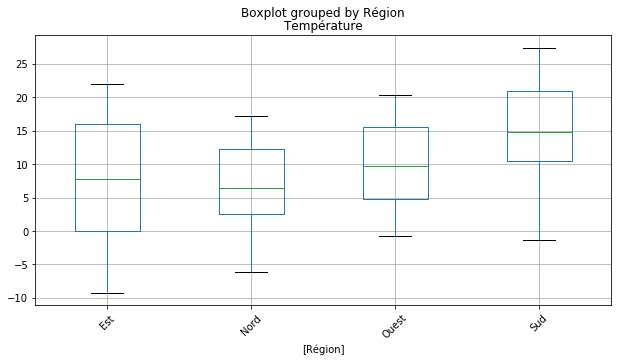

In [14]:
# on peut par exemple utiliser cette vue pour faire des affichages de la distribution marginale des données par région
flattened.boxplot(by='Région',grid=True, rot=45, figsize=(10,5));


Dans le dernier exemple, on voit que les colonnes sont triées par ordre alphabétique. On n'a pas envie de ce comportement. On verra plus tard comment le package d'affichage `seaborn` permet d'aller plus loin dans l'affichage

## 4. Visualisation des données

### a. Avec pandas

On a vu comment accéder aux données multidimensionnelle assez facilement avec pandas, et les manipuler pour afficher ce qui nous semble pertinent.

Dans le dernier exemple, on a vu que pandas fournit certains outils d'affichage intégrés. Il en existe d'autres.
La plus simple est l'affichage de courbes (`plot`)

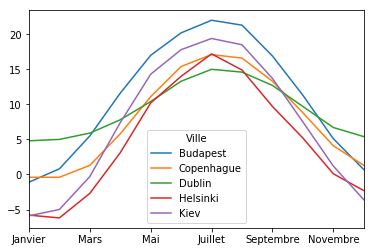

In [15]:
data[months].loc['Budapest':'Kiev'].T.plot();


Un affichage plus évolué pourrait être un nuage de points (_scatter plot_), où chaque ville apparait en fonction de ses coordonnées GPS, avec une couleur qui dépend de sa température en Août.

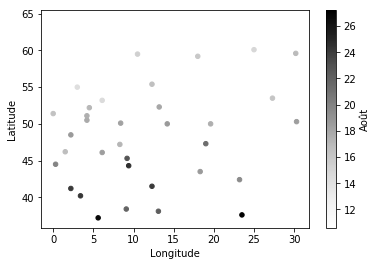

In [16]:
data.plot.scatter(x='Longitude', y='Latitude', c='Août', sharex=False);



### b. Avec `seaborn`

Même si `pandas` est un package très puissant et possède certaines fonctions d'affichage, ce n'est pas sa fonction fondamentale d'offrir des fonctionalités de visualisation.

C'est par contre à cette fin qu'est développé un autre package très utile: [`seaborn`](https://seaborn.pydata.org/). En plus, `seaborn` est __conçu pour s'interfacer avec `pandas`__. En pratique, `seaborn` est une surcouche de la très puissante (mais moins facile à utiliser) bibliothèque [`matplotlib`](https://matplotlib.org/).

Voyons comment réaliser quelques affichages des données. Vous êtes invités à vous même regarder la [galerie d'exemples](https://seaborn.pydata.org/examples/index.html), pour voir ce que vous voudriez pouvoir afficher

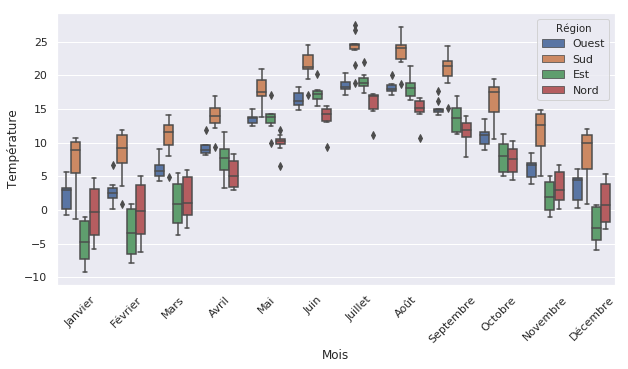

In [69]:
# on importe seaborn, et on règle tous ses paramètres esthétiques à leurs valeurs par défaut
import seaborn as sns
sns.set()

# premier exemple: un boxplot (boite à moustache) des températures par mois.

# on réarrange les données pour avoir toutes les températures "en vrac", avec leur région et mois correspondant
flattened = data.melt(id_vars='Région', value_vars=months, var_name='Mois', value_name='Température')
g = sns.boxplot(x='Mois', y='Température', data=flattened, hue='Région');

# on tourne les labels pour que ça soit plus joli
for item in g.get_xticklabels():
    item.set_rotation(45)

# on agrandit la figure
g.get_figure().set_size_inches(10,5)

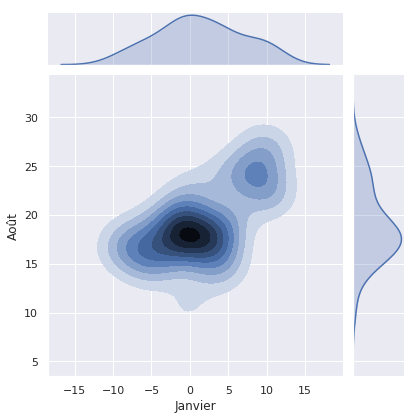

In [18]:
# Deuxième exemple: un affichage de la distribution jointe des températures sur deux mois donnés
# ainsi que les distributions marginales de chaque mois

sns.jointplot(x='Janvier', y='Août', kind='kde', shade_lowest=False, data=data);


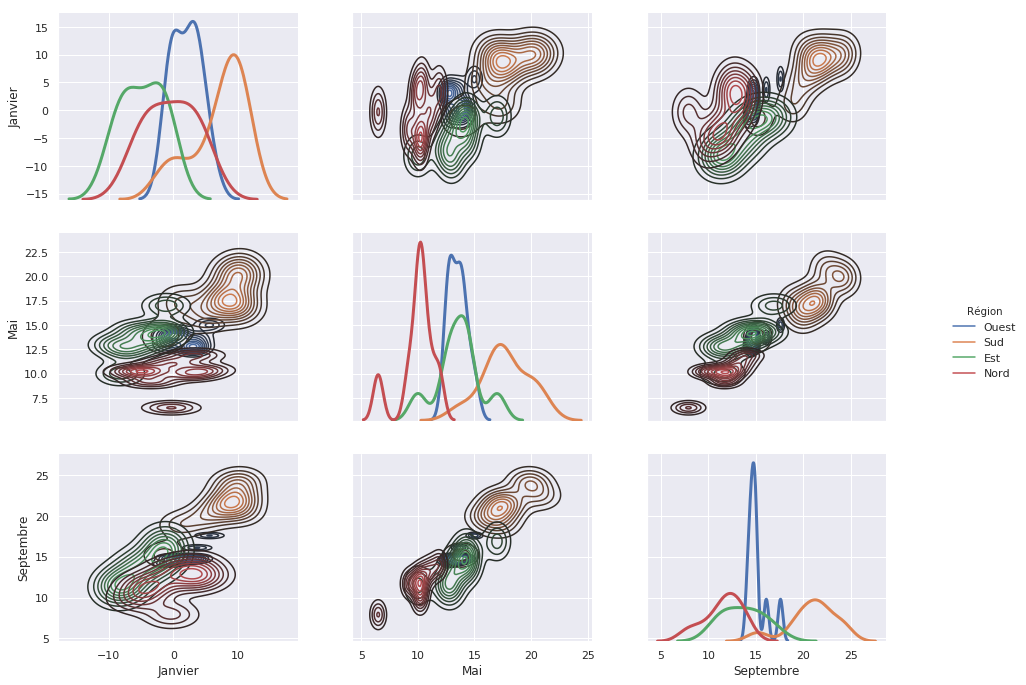

In [55]:
# Troisième exemple: on peut visualiser des données multidimensionnelles avec un pairgrid plot.
# Ça correspond à la figure précédente, mais pour chaque couple de variables. On peut aussi par
# exemple faire cet affichage d'une couleur différente en fonction d'une variable explicative
# (ici "Région") 

# création du canvas de pairgrid
g = sns.PairGrid(data, diag_sharey=False, vars=months[::4], hue='Région')

# les termes non diagonaux sont traités avec kdeplot
g.map_offdiag(sns.kdeplot)

# pour les termes diagonaux, on affich la distribution marginale (histogramme)
g.map_diag(sns.kdeplot,lw=3, legend=False)

# on rajoute la légende et on agrandit la figure
g = g.add_legend()

# on agrandit la figure
g.fig.set_size_inches(15,10)



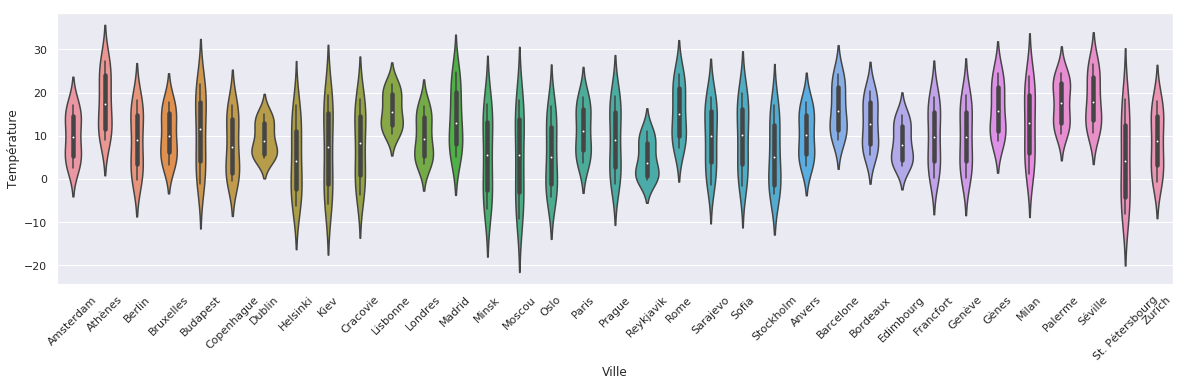

In [70]:
# Quatrième exemple: affichage des histogrammes des températures de chaque ville 
# on commence par réarranger les données
flattened = data.reset_index().melt(id_vars = ['Ville'], value_vars=months, var_name='Mois', value_name='Température')

# affichage du violinplot
g = sns.violinplot(data=flattened, x='Ville', y='Température')

# on tourne les labels pour que ça rentre
for item in g.get_xticklabels():
    item.set_rotation(45)

# on agrandit la figure
g.get_figure().set_size_inches(20,5)